In [1]:
import requests
import json
import pandas as pd
import csv
import datetime
import dateutil.parser
import unicodedata

#This module provides regular expressions
import re

In [2]:
# Reads dataset file
df = pd.read_csv('D:/Users/krishpot/4th year 1st SEM/CSE 15 Data Mining/Data Set_Student Reviews.csv', header = None, encoding='utf-8')

# Changes header title
df.columns=['Text']

df

Text
0                                              Reviews
1    1.                 Before uploading the video ...
2    2.                Before, she is kind to her s...
3    3.                Can be improved. Hope she co...
4    4.                For this subject, some topic...
..                                                 ...
849  846.       The professor was active in google ...
850   847.        Very nice and accommodating teacher!
851  848.       Words  can''t express how i am grat...
852  849.       in my opinion, the instructor''s wa...
853  850.        please speak tagalog when teaching...

[854 rows x 1 columns]

In [19]:
# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = text.lower()
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7F]+',r' ', text) # replace non-ASCII characters
    text = re.sub('\s\s+', ' ', text)  # remove extra whitespace
    return text

# Cleaning the text in the Text column
df['Cleaned_Text'] = df['Text'].apply(clean)
df

Text  \
171  -                   She didn''t release our gr...   
50                    -                   Titus 2:7-8"   
312  -                   she only reads the module ...   
1    1.                 Before uploading the video ...   
10   10.             I appreciate the faculty conce...   
..                                                 ...   
97   96.           At first, I liked my professor b...   
98   97.            Doesn''t conduct classes, but p...   
99                        98.           Excellent prof   
100  99.           For the duration of this semeste...   
0                                              Reviews   

                                          Cleaned_Text  \
171   she didn t release our grades from prelims to...   
50                                              titus    
312   she only reads the module when she is having ...   
1     before uploading the video discussion i sugge...   
10    i appreciate the faculty concerned in this su...   
..                                                 ...   
97    at first i liked my professor because she is ...   
98         doesn t conduct classes but post activities   
99                                      excellent prof   
100   for the duration of this semester she never d...   
0                                              reviews   

                                     removed_stopwords  
171               [release, grades, prelims, midterms]  
50                                             [titus]  
312  [reads, module, class, explanations, students,...  
1    [uploading, video, discussion, suggest, discus...  
10   [appreciate, faculty, concerned, subject, effo...  
..                                                 ...  
97   [first, liked, professor, strict, learned, muc...  
98                [conduct, classes, post, activities]  
99                                   [excellent, prof]  
100  [duration, semester, never, discussed, lessons...  
0                                            [reviews]  

[854 rows x 3 columns]

In [20]:
df.loc[0, 'Cleaned_Text']

'reviews'

In [21]:
# Sorts Text column
df.sort_values('Text', inplace = True)

# Counts numbers of duplicates
duplicates = df.pivot_table(columns=['Text'], aggfunc='size')
duplicates

Text
-                   She didn''t release our grades from prelims to midterms."                                                                                                                                                                                                                                                                                                                                                                                                             1
-                   Titus 2:7-8"                                                                                                                                                                                                                                                                                                                                                                                                                                                          1
-                   she only reads the modu

In [24]:
#set tagalog stopwords
stop_words_tl = ["akin","aking","ako","alin","am","amin","aming","ang","ano","anumang",
 "apat","at","atin","ating","ay","bababa","bago","bakit","bawat","bilang","dahil",
 "dalawa","dapat","din","dito","doon","gagawin","gayunman","ginagawa","ginawa",
 "ginawang","gumawa","gusto","habang","hanggang","hindi","huwag","iba","ibaba",
 "ibabaw","ibig","ikaw","ilagay","ilalim","ilan","inyong","isa","isang","itaas",
 "ito","iyo","iyon","iyong","ka","kahit","kailangan","kailanman","kami","kanila",
 "kanilang","kanino","kanya","kanyang","kapag","kapwa","karamihan","katiyakan",
 "katulad","kaya","kaysa","ko","kong","kulang","kumuha","kung","laban","lahat",
 "lamang","likod","lima","maaari","maaaring","maging","mahusay","makita","marami",
 "marapat","masyado","may","mayroon","mga","minsan","mismo","mula","muli","na",
 "nabanggit","naging","nagkaroon","nais","nakita","namin","napaka","narito","nasaan",
 "ng","ngayon","ni","nila","nilang","nito","niya","niyang","noon","o","pa","paano",
 "pababa","paggawa","pagitan","pagkakaroon","pagkatapos","palabas","pamamagitan",
 "panahon","pangalawa","para","paraan","pareho","pataas","pero","pumunta","pumupunta",
 "sa","saan","sabi","sabihin","sarili","sila","sino","siya","tatlo","tayo","tulad",
 "tungkol","una","walang"]

In [25]:
#convert the list to set to match the type of the english stopwords
stop_words_tl = set(stop_words_tl)

In [22]:
#set english stopwords
import nltk
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
stop_words_en=set(stopwords)
print(stop_words_en)

{'each', 'i', 'because', 'for', 'nor', 'have', "couldn't", 'a', 'same', 'their', 'you', 'him', "hadn't", 'aren', 'up', 've', 'me', 'ma', 'needn', 'this', 'y', 'against', 'not', "aren't", 'on', 'hadn', 'are', 'between', 'at', 'below', "weren't", "you'd", 'whom', 'its', 'off', "that'll", 'our', 'they', 'so', 'to', 'hasn', "it's", 'until', 'am', 'few', 'mustn', 'didn', 's', 'my', 'has', 'some', 'just', 'most', "she's", 'his', 'all', 'or', 'while', "wasn't", "won't", 'did', 'about', 'her', 'more', 'your', 'mightn', 'theirs', 'shouldn', 'than', 'as', 'any', 'wasn', "hasn't", 'where', 'if', 'those', "doesn't", 'don', 'having', 'then', 'them', 'herself', 'be', 'will', 'been', 'we', 'ourselves', "isn't", "mightn't", 'o', 'out', 'such', 'm', "you've", 'once', 'and', 'doing', 'but', 'doesn', 'shan', 'won', 'an', 'll', 'only', 'here', 'both', 're', 'ain', 'other', 'again', 'being', 'she', 'who', 'from', "don't", 'these', 'do', 'into', 'it', 'own', "haven't", 'yours', 'in', 'what', "shan't", 'afte

In [26]:
#removing english and tagalog stopwords
from nltk.tokenize import word_tokenize

def removing_en_stopwords(text):
    tokens = word_tokenize(text)
    text = [word for word in tokens if not word in stop_words_tl if not word in stop_words_en]
    return text
df['removed_stopwords'] = df.Cleaned_Text.apply(lambda x: removing_en_stopwords(x))
df

Text  \
171  -                   She didn''t release our gr...   
50                    -                   Titus 2:7-8"   
312  -                   she only reads the module ...   
1    1.                 Before uploading the video ...   
10   10.             I appreciate the faculty conce...   
..                                                 ...   
97   96.           At first, I liked my professor b...   
98   97.            Doesn''t conduct classes, but p...   
99                        98.           Excellent prof   
100  99.           For the duration of this semeste...   
0                                              Reviews   

                                          Cleaned_Text  \
171   she didn t release our grades from prelims to...   
50                                              titus    
312   she only reads the module when she is having ...   
1     before uploading the video discussion i sugge...   
10    i appreciate the faculty concerned in this su...   
..                                                 ...   
97    at first i liked my professor because she is ...   
98         doesn t conduct classes but post activities   
99                                      excellent prof   
100   for the duration of this semester she never d...   
0                                              reviews   

                                     removed_stopwords  
171               [release, grades, prelims, midterms]  
50                                             [titus]  
312  [reads, module, class, explanations, students,...  
1    [uploading, video, discussion, suggest, discus...  
10   [appreciate, faculty, concerned, subject, effo...  
..                                                 ...  
97   [first, liked, professor, strict, learned, muc...  
98                [conduct, classes, post, activities]  
99                                   [excellent, prof]  
100  [duration, semester, never, discussed, lessons...  
0                                            [reviews]  

[854 rows x 3 columns]

Data Exploration

In [27]:
#Convert list to String
df2 = pd.DataFrame(columns=['removed_stopwords'])
def listToString(s): 
    str1 = ""
    for ele in s:
        str1 = str1 + " " + ele
    return str1
df2['cleaned_texts'] = df.removed_stopwords.apply(lambda x:listToString(x))

In [28]:
#Export dataframe for manual clssification and rule based classification
df2.to_csv('sentimentAnalysis_en.csv')
del df2['removed_stopwords']
df2

cleaned_texts
171                    release grades prelims midterms
50                                               titus
312   reads module class explanations students gift...
1     uploading video discussion suggest discuss cl...
10    appreciate faculty concerned subject efforts ...
..                                                 ...
97    first liked professor strict learned much dis...
98                     conduct classes post activities
99                                      excellent prof
100   duration semester never discussed lessons eve...
0                                              reviews

[854 rows x 1 columns]

In [29]:
# Sorts Text column
df2.sort_values('cleaned_texts', inplace=True, ascending = True)
df2.head(40)

cleaned_texts
445                                                   
540                                                   
177                                                   
823                                                   
535                                                   
534                                                   
533                                                   
140                                                   
463                                                   
146                                                   
114                                                   
817                                                   
274                                                   
273                                                   
747                                                   
462                                                   
504                                                   
460                                                   
551                                                   
80                                                    
632                                                   
60                                                    
106                                                   
108                                                   
422                       academic knowledge excellent
338   accommodating attends concern make sure well ...
494                            accommodating professor
656   accomodating considerate gained lot knowledge...
740   accomodating responsive students queries exce...
766   accounting made lot easier enjoyable dedicati...
272    act like mother line naman grades nyo eh hehehe
505                            active google classroom
464   activities difficult learning materials diffi...
43    activities doable recorded lectures detailed ...
235   activities given taken internet thus form pla...
202   activities really tiring fact exceeds time sp...
96    activities timed okay sometimes frustrating e...
609   actually instructor oblicdon enrolled subject...
326   adequate knowledge subject suggest step teach...
118   admire ms teacher knowledgeable also consider...

In [30]:
# Replaces empty string rows with NaN vallues
nan_value = float("NaN")
df2['cleaned_texts'].replace("", nan_value, inplace=True)

# Drops NaN Values
df2.dropna(subset = ["cleaned_texts"], inplace=True)
df2

cleaned_texts
422                       academic knowledge excellent
338   accommodating attends concern make sure well ...
494                            accommodating professor
656   accomodating considerate gained lot knowledge...
740   accomodating responsive students queries exce...
..                                                 ...
249                             wish synchronous meets
475    withdrawed class beginning semester please mind
851                   words express grateful professor
476   would better teacher first discuss lessons gi...
222   would often post assignments midnight underst...

[830 rows x 1 columns]

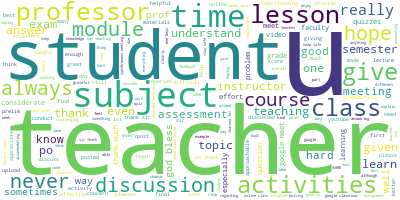

In [31]:
#word cloud
from wordcloud import WordCloud
long_string = ','.join(list(df2['cleaned_texts'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl  

In [33]:
# Adds a column which adds the length of each phrases
df2['Length'] = df2['cleaned_texts'].apply(len)
df2

cleaned_texts  Length
422                       academic knowledge excellent      29
338   accommodating attends concern make sure well ...      53
494                            accommodating professor      24
656   accomodating considerate gained lot knowledge...      96
740   accomodating responsive students queries exce...      69
..                                                 ...     ...
249                             wish synchronous meets      23
475    withdrawed class beginning semester please mind      48
851                   words express grateful professor      33
476   would better teacher first discuss lessons gi...      61
222   would often post assignments midnight underst...     307

[830 rows x 2 columns]

<AxesSubplot:ylabel='Frequency'>

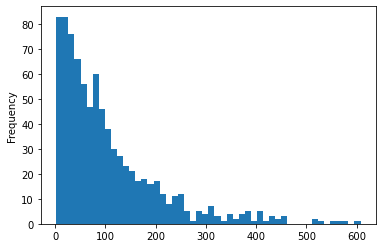

In [34]:
# Plots the frquency of Phrases
df2['Length'].plot(kind = 'hist' , bins = 50)